# Исследование рынка игровой индустрии

<font size="5"><b>Содеражание</b></font>

1 [Краткое описание проекта](#1)

2 [Получение данных](#2)

3 [Предобработка данных](#3)

4 [Исследовательский анализ данных](#4)

&nbsp;&nbsp;4.1 [Определение количества выпускаемых игр по годам](#4.1)

&nbsp;&nbsp;4.2 [Определение потенциально прибыльных платформ](#4.2)

&nbsp;&nbsp;4.3 [Определение зависимости продаж от  рейтинга игр](#4.3)

&nbsp;&nbsp;4.4 [Определение самых популярных платформ и жанров в различных регионах](#4.4)

&nbsp;&nbsp;4.5 [Определение влияние ESRB рейтинга на продажи в различных регионах](#4.5)

5 [Статистический анализ данных](#5)

&nbsp;&nbsp;5.1 [Определение изменения пользовательского рейтинга и рейтинга критиков в различных жанрах](#5.1)

&nbsp;&nbsp;5.2 [Проверка гипотез](#5.2)

&nbsp;&nbsp;&nbsp;&nbsp;5.2.1 [Проверка первой гипотезы](#5.2.1)

&nbsp;&nbsp;&nbsp;&nbsp;5.2.2 [Проверка второй гипотезы](#5.2.2)

6 [Общие выводы](#6)

<a id='1'></a>
## Краткое описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<b>Описание данных</b>

Таблица имеет 11 столбцов с данными продаж игр до 2016 года:
* Name — название игры;
* Platform — платформа ;
* Year_of_Release — год выпуска;
* Genre — жанр игры;
* NA_sales — продажи в Северной Америке (миллионы долларов);
* EU_sales — продажи в Европе (миллионы долларов);
* JP_sales — продажи в Японии (миллионы долларов);
* Other_sales — продажи в других странах (миллионы долларов);
* Critic_Score — оценка критиков (от 0 до 100);
* User_Score — оценка пользователей (от 0 до 10);
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board), присваивающий подходящую возрастную категорию.

<a id='2'></a>
##  Получение данных

Импортируем библиотеку pandas и выгрузим данные из csv-файла, сохранив как дата-фрейм в переменной *df*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings

df = pd.read_csv('~/Data_analytics/yandex_partikum/games.csv')

Получим первые двадцать строк таблицы.

In [2]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Получим информацию о типе данных столбов *df*.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Выводы</b>

Различие в количеcтве не пустых значений (Non-null) и индексов в столбцах *'name'*, *'year_of_release'*, *'genre'*, *'critic_score'*, *'user_score'*, *'rating'* говорит о присутствии пропущенных значений (NaN) в данных столбцах, которые необходимо обработать. К столбцу *'user_score'* следует обратить особое внимание, так как он имеет тип данных - object, значит в данном столбце присутствует строковый тип данных. Данный столбец следует преобразовать к float и обработать строковые значения. 

<a id='3'></a>
## Преодобработка данных

Приведем название столбцов к нижнему регистру и удалим пробелы в начале и в конце названий.

In [4]:
df.columns = df.columns.str.lower().str.strip()

Проверим название столбцов.

In [5]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Найдем значения, которые не имеют числовой вид, в столбце 'user_score'.

In [6]:
str_values = [user_score for user_score in df['user_score'].str.findall('[A-zА-я\s]+')]

def find_unique_values(set_values):
    unique_str_values = []
    for value in set_values:
        if value not in unique_str_values:
            unique_str_values.append(value)
        else:
            continue
    return unique_str_values

find_unique_values(str_values)


[[], nan, ['tbd']]

Было найдено 3 значения: [] - пустой list, т.е. значения, которые не были найдены через паттерн регулярного выражения, ищущий не числа и пробелы, NaN - пропущенные строки, приведенные к числовому виду и плейсхолдер *'tbd'*, обозначающий, что оценка будет определена позже. Заменим пока *'tbd'* на пустую строку.

In [7]:
df['user_score'] = df['user_score'].replace('tbd', '')
str_values = [user_score for user_score in df['user_score'].str.findall('[A-zА-я\s]+')]

Проверим уникальные значения в *'user_score'*.

In [8]:
find_unique_values(str_values)

[[], nan]

В столбце *'user_score'* остались числа и NaN.

Посчитаем количество пустых значений в других столбцах

In [9]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Посмотрим в каких строках столбец *'name'* принимает пустое значение.

In [10]:
df[df["name"].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видно, что две строки имеют значение *NaN* в столбах *'name'* и *'genre'*, это может говорить о проблемах с записью данных. Удалим данные строки.

In [11]:
df.dropna(subset=['name', 'genre'], inplace=True)

Проверим значения нулевые значения.

In [12]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Год выпуска (*'year_of_release'*) и рейтинг от организации ESRB (*'rating'*) описываются категориальными переменными. Заполним пустые значения в столбце *'rating'* строковым значением *'unknown'* и удалим пустые значения в *'year_of_release'*.

Пользовательский рейтинг (*'user_score'*) и рейтинг критиков (*'critic_score'*) являются количественными переменными. Пустые значения в этих столбцах заполним характерными значениями и приведем столбец *'user_score'* к числовому типу.

In [13]:
df['rating'] = df['rating'].fillna('unknown')

In [14]:
df.dropna(subset=['year_of_release'], inplace=True)

In [15]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

Так как нет достаточно данных для заполнения пропущенных значений в столбцах *'user_score'* и *'critic_score'*, и заполнение NaN характерными значениями могу сильно исказить результаты, то оставим NaN в данных столбцах.

Приведем столбец *'user_score'* к числовому типу

In [16]:
df['user_score'] = pd.to_numeric(df['user_score'])

Приведем значение столбца '*year_of_release*' к целому числу (int), так как года представляют собой дискретные величины.

In [17]:
df['year_of_release'] = df['year_of_release'].astype(int)

Проверим тип данных столбцов дата-фрейма df.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Найдем дубликаты и уникальные значения в столбце *'genre'*.

In [19]:
df.duplicated().sum()

0

Данные в дата-фрейме обработали, теперь посчитаем суммарные продажи во всех регионах и запишем в новый столбец '*total_sales*'.

In [20]:
df['total_sales'] = df['na_sales'] + df["eu_sales"] + df["jp_sales"]

In [21]:
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,30.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,29.68
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,26.08
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,27.84


Предобработка данных завершена, перейдем к анализу данных.

<a id='4'></a>
## Исследовательский анализ данных

<a id='4.1'></a>
### Определение количества выпускаемых игр по годам

Построим график зависимости выпущенных игр по годам.

In [22]:
df.groupby("year_of_release")["name"].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

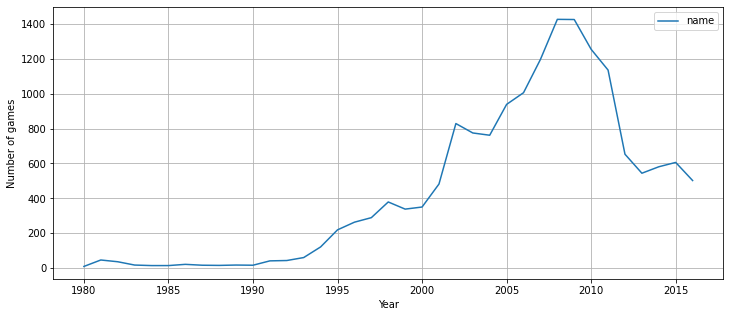

In [23]:
df.pivot_table(index="year_of_release", values="name", aggfunc="count").plot(grid=True, figsize=(12, 5))
plt.xlabel("Year")
plt.ylabel("Number of games");


Построим график зависимости продаж по годам.

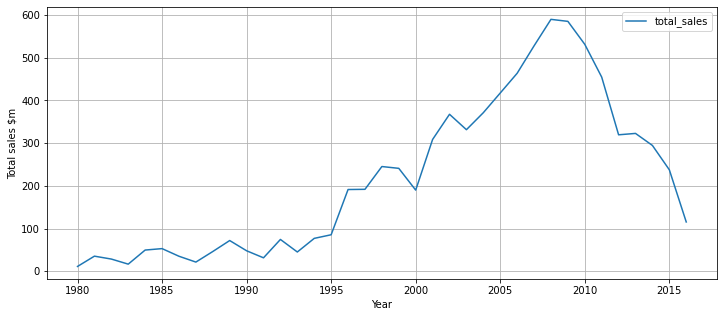

In [24]:
df.pivot_table(index="year_of_release", values="total_sales", aggfunc="sum").plot(grid=True, figsize=(12, 5))
plt.xlabel("Year")
plt.ylabel("Total sales $m");

<b>Выводы</b>

Из графиков видно, что пик продаж пришелся на 2008-2009 года. Увеличение скорости роста продаж началось примерно с 2000 года, до 1995 года количество выпущенных игр назначительно росло.
Вероятно, рост продаж до 2008-2009 года и последующее падение связано с мировым финансовым кризисом в 2008 году, а также появлением Iphone в 2008, благодаря которому начала стремительно развиваться индустрия мобильных игр и крупные компании направили часть ресурсов в эту отрасль.

<a id="4.2"></a>
### Определение потенциально прибыльных платформ

Сгруппируем данные по платформам и определим самые популярные.

In [25]:
platform_data = df.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
platform_data

platform
PS2     1043.09
X360     876.36
Wii      813.47
PS3      796.75
DS       743.74
PS       686.89
GBA      305.27
PS4      265.79
PSP      248.77
GB       246.27
NES      245.74
3DS      244.54
XB       243.09
PC       233.88
N64      213.70
SNES     196.82
GC       191.60
XOne     145.05
2600      85.64
WiiU      76.24
PSV       47.38
SAT       33.52
GEN       27.46
DC        15.68
SCD        1.81
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Выберем топ 10 самых продаваемых платформ и построим графики распределения продаж по годам.

In [26]:
best_selling_platforms = platform_data.iloc[:10]

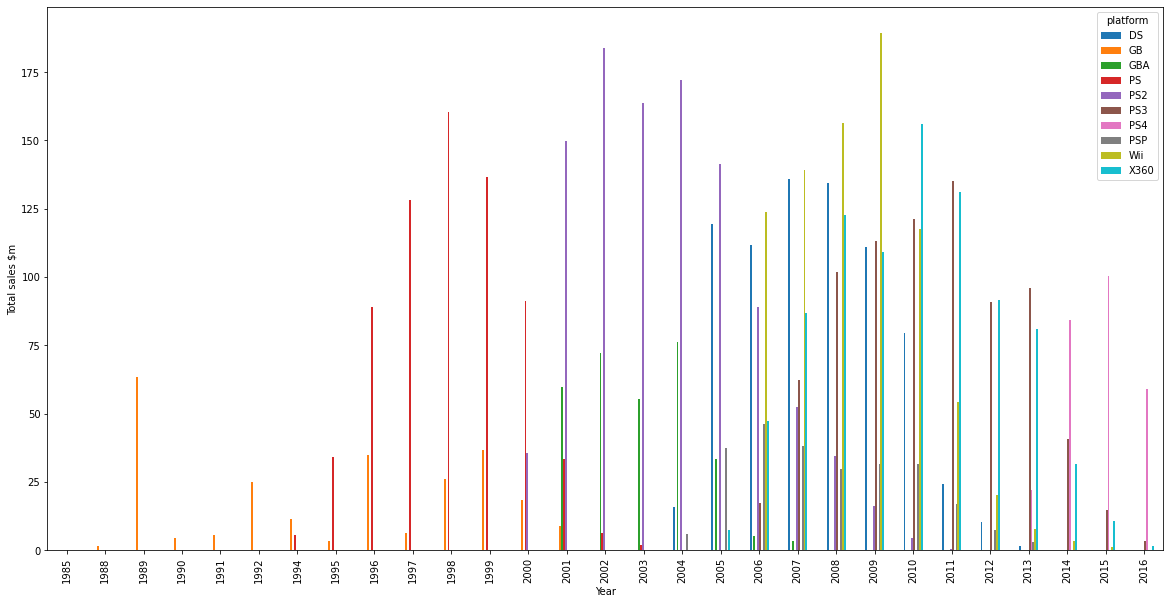

In [27]:
df.query("platform in @best_selling_platforms.index").pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum").plot(kind="bar", figsize=(20, 10));
plt.xlabel("Year")
plt.ylabel("Total sales $m");

Из столбчатого графика распределения продаж по годам видно, что самые топ 10 самых продаваемых платформ охватывают период с 1988 по 2016 год.

Определим период жизни платформ.

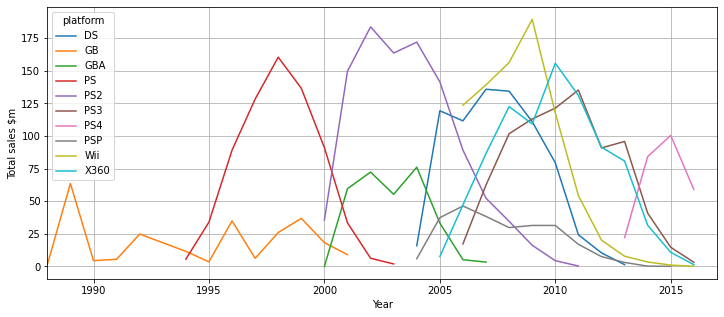

In [28]:
df.query("platform in @best_selling_platforms.index").pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum").plot(grid=True,figsize=(12, 5));
plt.xlabel("Year")
plt.ylabel("Total sales $m")
plt.xlim([1988, 2017]);

In [29]:
desc_best_selling_platforms = df.query("platform in @best_selling_platforms.index").groupby("platform")["year_of_release"].describe()
desc_best_selling_platforms

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
DS,2121.0,2008.185290,1.778565,1985.0,2007.0,2008.0,2009.0,2013.0
GB,97.0,1995.958763,4.178111,1988.0,1992.0,1997.0,2000.0,2001.0
GBA,811.0,2003.210851,1.474451,2000.0,2002.0,2003.0,2004.0,2007.0
PS,1190.0,1998.005882,1.848091,1994.0,1997.0,1998.0,1999.0,2003.0
PS2,2127.0,2004.583921,2.567689,2000.0,2002.0,2005.0,2007.0,2011.0
PS3,1306.0,2010.840735,2.459616,2006.0,2009.0,2011.0,2013.0,2016.0
PS4,392.0,2015.145408,0.868181,2013.0,2015.0,2015.0,2016.0,2016.0
PSP,1193.0,2008.731769,2.434057,2004.0,2006.0,2009.0,2011.0,2015.0
Wii,1286.0,2008.966563,1.542034,2006.0,2008.0,2009.0,2010.0,2016.0


По значениям столбцов *'min'* и *'max'* получим период существования платформ.

In [30]:
desc_best_selling_platforms["max"] - desc_best_selling_platforms["min"]

platform
DS      28.0
GB      13.0
GBA      7.0
PS       9.0
PS2     11.0
PS3     10.0
PS4      3.0
PSP     11.0
Wii     10.0
X360    11.0
dtype: float64

Видно, что средняя продолжительность жизни платформ составляет 10-11 лет. У платформы *'DS'* продолжительность выпуска игр составляет 28 лет, и из таблицы *desc_best_selling_platforms* видно, что первая игра выпущена в 1985 году, хотя данная платформа была выпущена в 2004 году. Посмотрим внимательнее на игры, которые были выпущены до 2004 года.

In [31]:
df.query("platform == 'DS' and year_of_release < 2004")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


Единственная игра, выпушенная до 2004 года - это Strongest Tokyo University Shogi DS, что говорит, о том что это ошибка и данные неправильно записались. Определим прололжительность жизни платформы 'DS'. 	

In [32]:
data_of_ds_platform = df.query("platform == 'DS' and year_of_release >= 2004").groupby("platform")["year_of_release"].describe()
data_of_ds_platform

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
DS,2120.0,2008.196226,1.70616,2004.0,2007.0,2008.0,2009.0,2013.0


In [33]:
data_of_ds_platform["max"] - data_of_ds_platform["min"]

platform
DS    9.0
dtype: float64

Продолжительность жизни платформы *DS* составляет 9 лет.

Из графиков распределения видно, что в прошлом самые популярными платформами являлись консоли компаний Sony (PS и PS2) и Nintendo (GBA, DS, GB).

В большинстве случаев продолжительность жизни платформ составляет 10-11 лет.

Посмотрим распределение продаж по платформам, начиная с 2010 года.

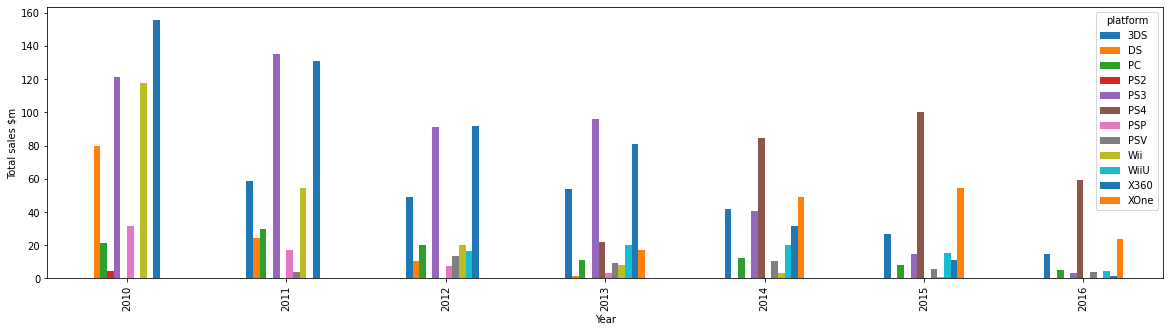

In [34]:
df.query("year_of_release >= 2010").pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum").plot(kind="bar", figsize=(20, 5));
plt.xlabel("Year")
plt.ylabel("Total sales $m");

Для того чтобы исключить значительное искажение распределения в 2016 году, где лидируют продажи игр на платформах PS4 и ХOne, нужно взять данные по годам,в которых включены данные по этим платформам (2013 - 2016 гг.), а также охватить несколько лет по лидирующим платформам предыдущих лет, чтобы определить тенденцию роста и падения продаж на разных платформах. Выберем данные, начиная с 2012 года.

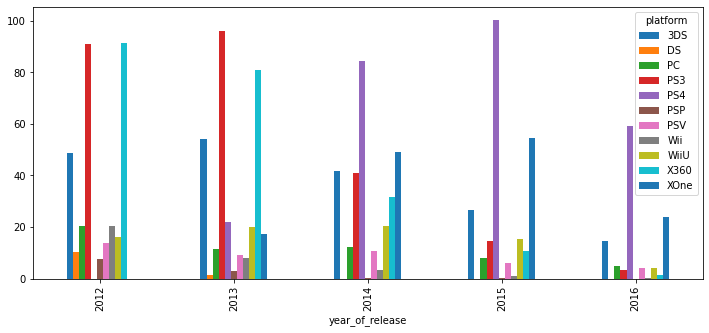

In [35]:
df.query("year_of_release >= 2012").pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum").plot(kind="bar", figsize=(12,5));

Наиболее прибыльные платформы за 2014-2016 год являются PS4, XOne и 3DS. В 2014-2015 годах PS4 и XOne показывали рост продаж, на 3DS продажи упали, но все еще значительные, по сравнению с другими платформами. Однако, по данным за 2016  на самых прибыльных платформах, PS4 и XOne, продажи упали, причиной такого распределния может быть неполнота данных за 2016. Все остальные, помимо PS4 и XOne, показывают падение продаж с 2014 по 2016 год.
Платформы, которые лидировали в прошлом - PS3, X360, WiiU, Wii- с каждым годом сильно падают, что говорит о закате данных платформ. Также наблюдается относительно стабильные продажи у платформы PC, хотя они не такие значительные по сравнению с лидерами и также имеет тенденцию к уменьшению количества продаж. Отсюда можно сделать вывод, что самыми потенциально прибыльными платфомами на данный момент являются PS4 и XOne.

Для последующего анализа удалим из текущего списка платформ те, у которых продажи значительно не падают с каждым годом (PS3, X360) и платформы, у которых очень низкие продажи или их вообще не было в 2015-2016 годах (DS, PSP, Wii). Будем анализировать данные по следующим платформам - PC, PS4, PSV, WiiU, XOne, 3DS.

Построим boxplot общей суммы продаж игр для выбранных платформ.

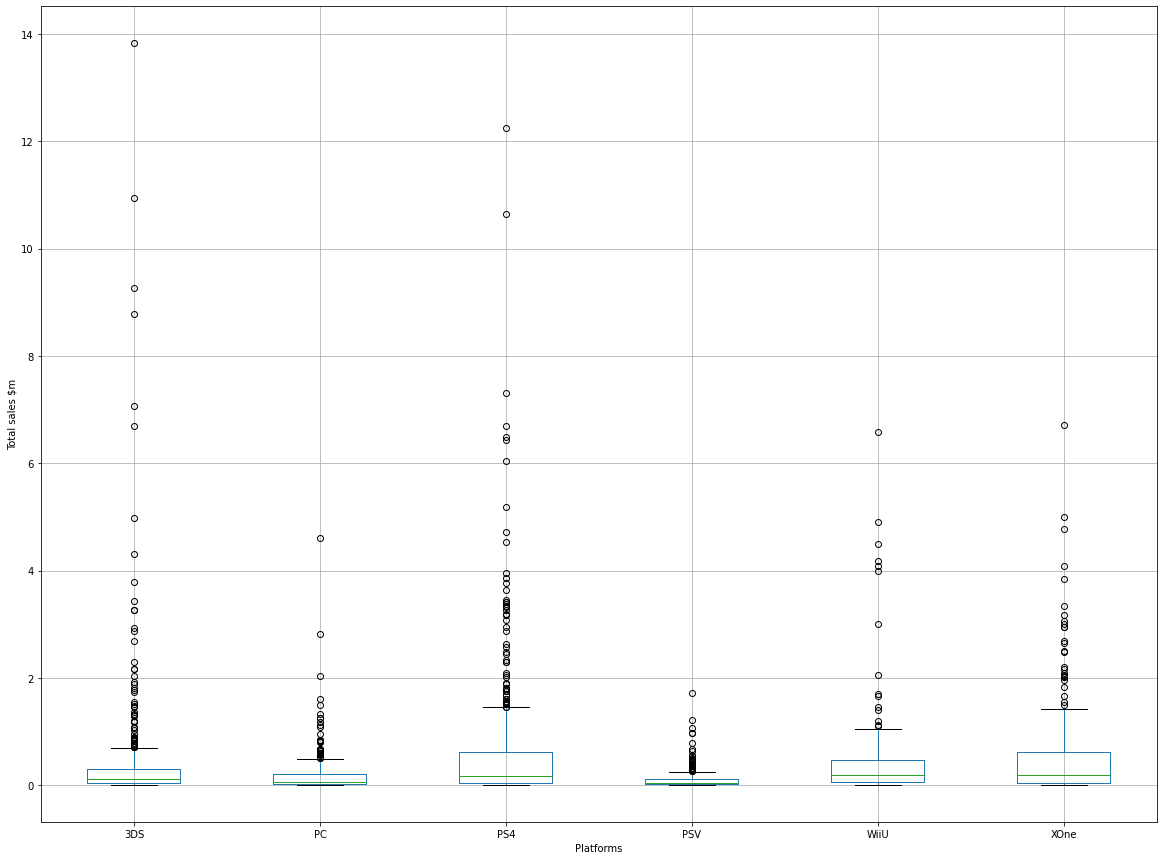

In [36]:
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

most_popular_platforms = df.query("year_of_release >= 2012 and platform in ('PC', 'PS4', 'PSV', 'WiiU', 'XOne', '3DS')")
most_popular_platforms.pivot_table(index="name", columns="platform", values="total_sales", aggfunc="sum").boxplot(grid=True, figsize=(20, 15));
plt.xlabel("Platforms")
plt.ylabel("Total sales $m");

Из-за большого количества выбросов график отрисовался в неудобном виде. Изменим масштаб графика.

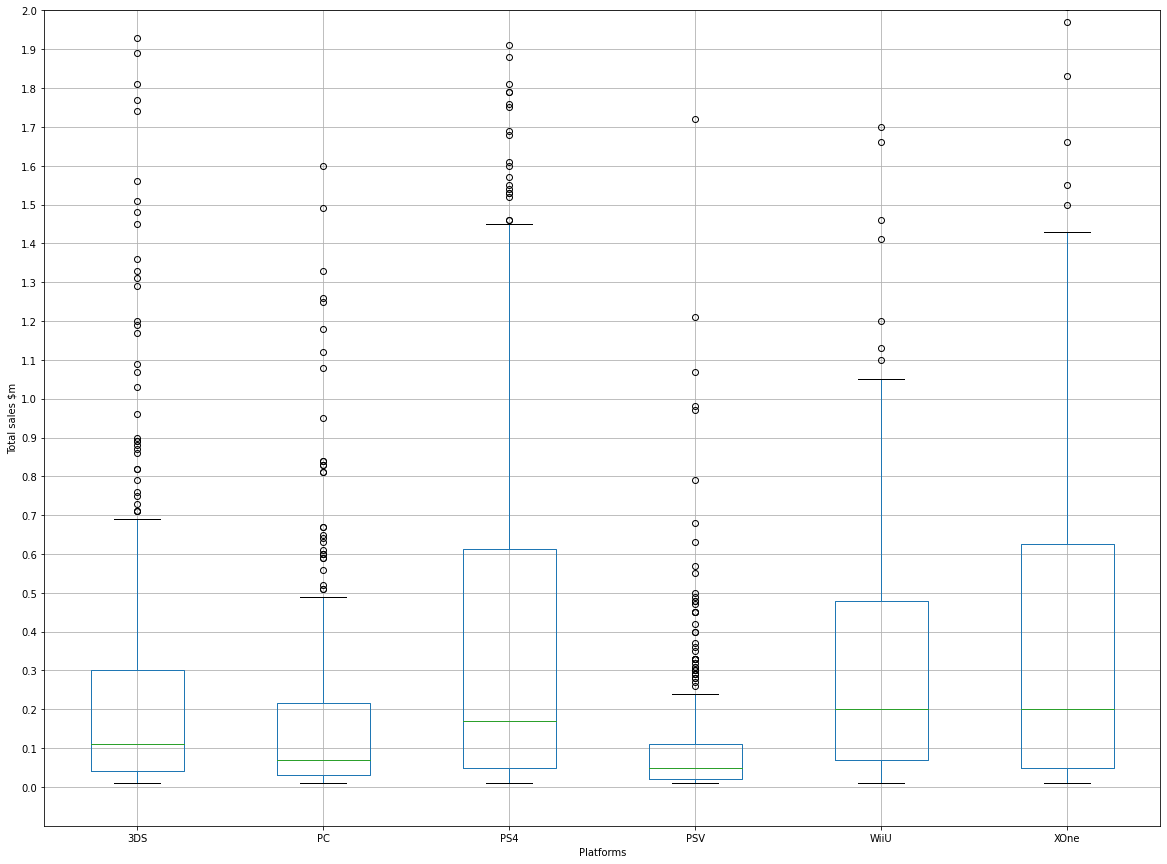

In [37]:
most_popular_platforms.pivot_table(index="name", columns="platform", values="total_sales", aggfunc="sum").boxplot(grid=True, figsize=(20, 15));
plt.yticks(np.arange(0, 14, step=0.1))
plt.xlabel("Platforms")
plt.ylabel("Total sales $m")
plt.ylim(-0.1, 2);

Определим основные характеристики выбранных данных.

In [38]:
most_popular_platforms.pivot_table(index="name", columns="platform", values="total_sales", aggfunc="sum").describe()

platform,3DS,PC,PS4,PSV,WiiU,XOne
count,396.00000,250.000000,392.000000,411.000000,147.000000,247.000000
mean,0.46904,0.227520,0.678036,0.105547,0.518639,0.587247
std,1.31250,0.444056,1.355221,0.169875,0.985139,0.942412
min,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.04000,0.030000,0.050000,0.020000,0.070000,0.050000
50%,0.11000,0.070000,0.170000,0.050000,0.200000,0.200000
75%,0.30000,0.217500,0.612500,0.110000,0.480000,0.625000
max,13.82000,4.600000,12.250000,1.720000,6.580000,6.710000


Самые продаваемые игры выпущены на платформах PS4, WiiU, XOne, 3DS. В среднее значение продаж на данных платформах примерно одинаковые ≈0,5 млн, кроме PS4, где это значение равно 0.678 млн. долларов, которое связано с самой высокой популярностью и продажами среди всех платформ. Однако из-за большого количества выбросов данные по средним продажам по играм завышено, о чем указывает медиана, которая находится в пределах 0.1 - 0.2 млн. долларов в зависимости от платформы, т.е. у половины всех игр продажи составляют не более, чем на 0.1 - 0.2 млн. долларов.

<b>Выводы</b>

- Продолжительность жизни платформ в большинстве случаев составляет 10-11 лет.
- Самые потенциально прибыльными платформы: PS4 и ХOne
- Самые продаваемые платформы за последние несколько лет: PS4, WiiU, XOne, 3DS.

<a id="4.3"></a>
### Определение зависимости продаж от  рейтинга игр

Для начала определим определим зависимость продаж и рейтинг игр по самой популярной платформе за последние года - PS4.

Построим диаграмму рассеяния пользовательского рейтинга и продаж.

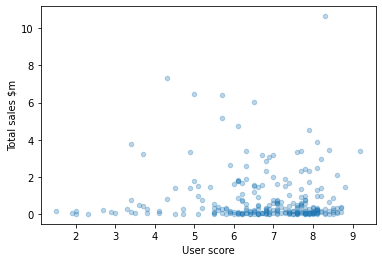

In [39]:
most_popular_platforms.query("platform == 'PS4'").loc[:, ["user_score", "total_sales"]].plot(x="user_score", y="total_sales", kind='scatter', alpha=0.3)
plt.xlabel("User score")
plt.ylabel("Total sales $m");

Посчитаем корреляцию.

In [40]:
most_popular_platforms.query("platform == 'PS4'")["user_score"].corr(most_popular_platforms.query("platform == 'PS4'")["total_sales"])

-0.03126053686666918

Построим диаграмму рассеяния рейтинга критиков и общих продаж.

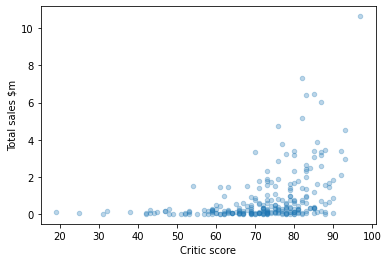

In [41]:
most_popular_platforms.query("platform == 'PS4'").loc[:, ["critic_score", "total_sales"]].plot(x="critic_score", y="total_sales", kind='scatter', alpha=0.3)
plt.xlabel("Critic score")
plt.ylabel("Total sales $m");

Посчитаем корреляцию.

In [42]:
most_popular_platforms.query("platform == 'PS4'")["critic_score"].corr(most_popular_platforms.query("platform == 'PS4'")["total_sales"])

0.4058867746520127

Коэффициент корреляции между оценками критиков, пользовательскими оценками и продажами составляет 0.40 и -0.03 соотвественно, т.е. продажи никак не зависят от оценок пользователей, а оценки критиков слабо влияют на продажи.

Соотнесем полученные выводы с продажами на других платформах.

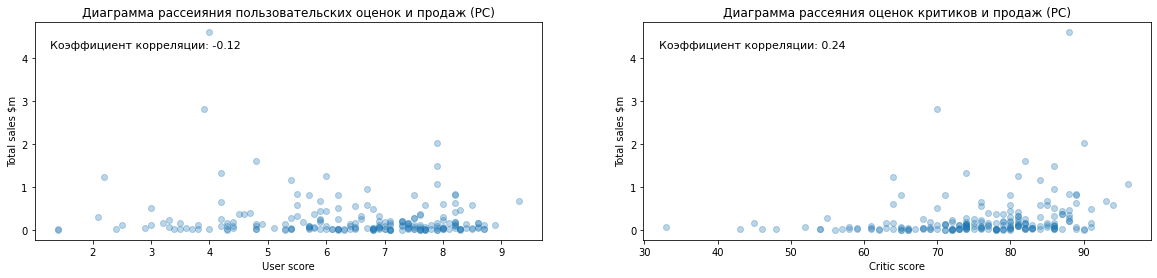

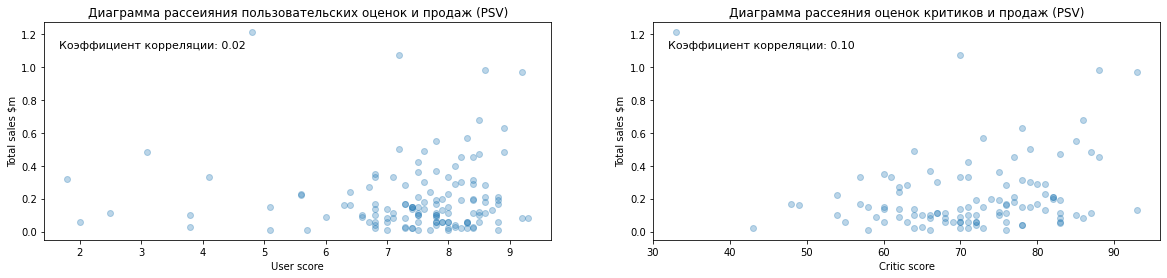

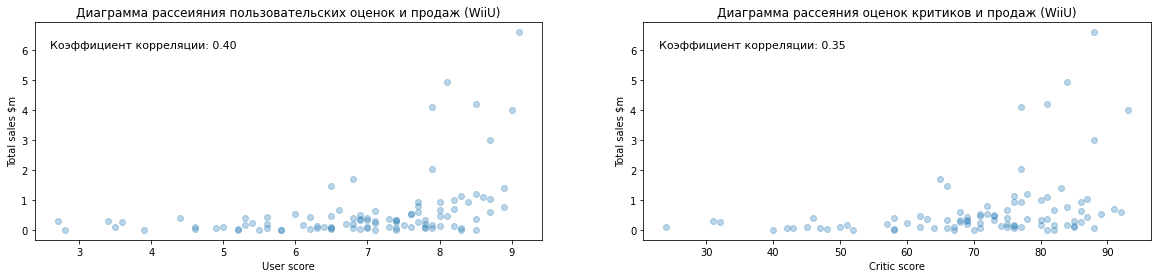

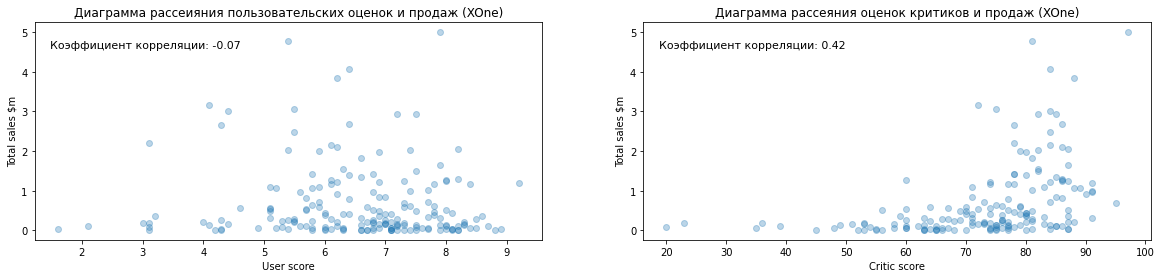

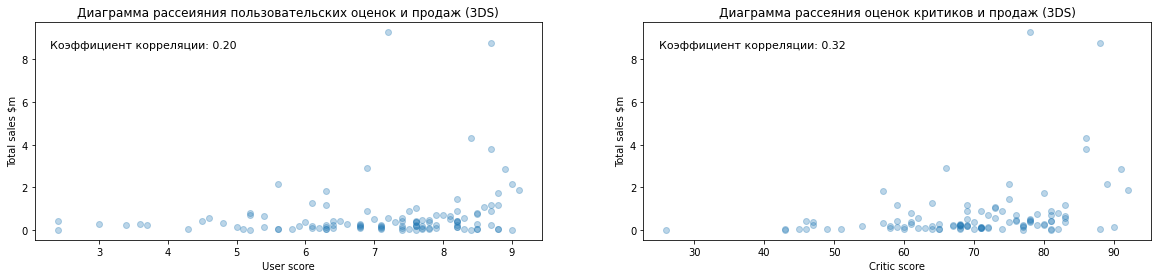

In [43]:
list_of_platforms = ['PC', 'PSV', 'WiiU', 'XOne', '3DS']

for platform in list_of_platforms:
    fig = plt.figure(figsize=[20, 4])
    ax_1 = fig.add_subplot(1, 2, 1)
    ax_2 = fig.add_subplot(1, 2, 2)
    
    user_scr_sales_data = most_popular_platforms.query(f"platform == '{platform}'").loc[:, ["user_score", "total_sales"]]
    correlation_user_scr_sales = most_popular_platforms.query(f"platform == '{platform}'")["user_score"].corr(most_popular_platforms.query(f"platform == '{platform}'")["total_sales"])
    ax_1.scatter(x="user_score", y="total_sales", data=user_scr_sales_data, alpha=0.3)
    ax_1.set_xlabel("User score")
    ax_1.set_ylabel("Total sales $m")
    ax_1.set_title(f"Диаграмма рассеияния пользовательских оценок и продаж ({platform})", fontsize=12)
    ax_1.text(0.03, 0.88, f"Коэффициент корреляции: {correlation_user_scr_sales:.2f}", fontsize=11, transform=ax_1.transAxes)

    critic_scr_sales_data = most_popular_platforms.query(f"platform == '{platform}'").loc[:, ["critic_score", "total_sales"]]
    correlation_critic_scr_sales = most_popular_platforms.query(f"platform == '{platform}'")["critic_score"].corr(most_popular_platforms.query(f"platform == '{platform}'")["total_sales"])
    ax_2.scatter(x="critic_score", y="total_sales", data=critic_scr_sales_data, alpha=0.3)
    ax_2.set_xlabel("Critic score")
    ax_2.set_ylabel("Total sales $m")
    ax_2.set_title(f"Диаграмма рассеяния оценок критиков и продаж ({platform})", fontsize=12)
    ax_2.text(0.03, 0.88, f"Коэффициент корреляции: {correlation_critic_scr_sales:.2f}", fontsize=11, transform=ax_2.transAxes)
    plt.show()

На других платформах, как и на платформе PS4 самые продаваемые игры имеют относительно невысокие оценки критиков, и пользователей и имеют слабую корреляцию.
В целом на других платформах зависимость такая же, как и на PS4, т.е. оценки пользователей никак не коррелируют с продажами, а оценки критиков слабо влияют на продажи.

Рассмотрим распределние по жанрам всех платформ, начиная с 2012 года.

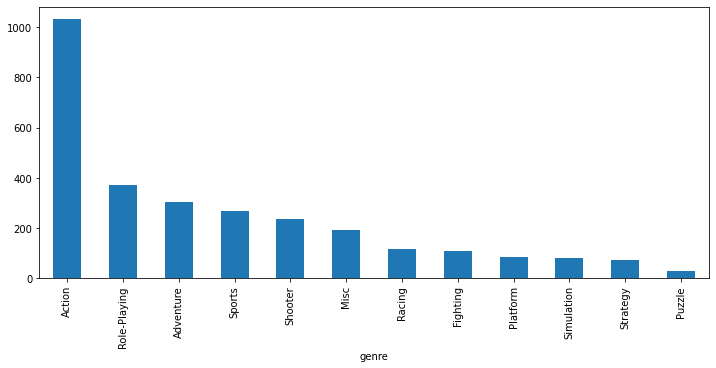

In [44]:
df[df["year_of_release"] >= 2012].groupby("genre")["genre"].count().sort_values(ascending=False).plot(kind="bar", figsize=(12, 5));

Самое большое количество выпущенных игр по жанрам - action.

Определим самый популярный жанр по продажам.

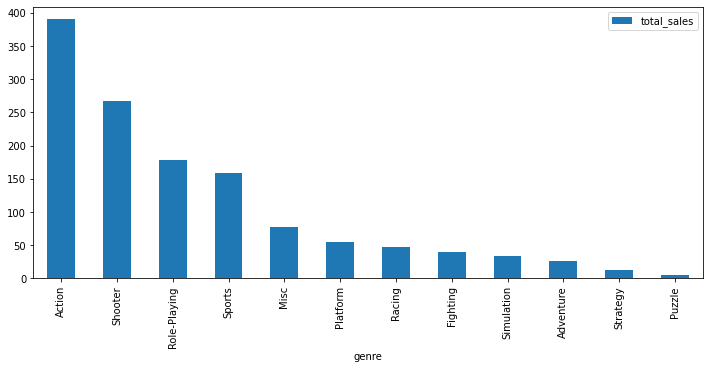

In [45]:
df[df["year_of_release"] >= 2012].pivot_table(index="genre", values="total_sales", aggfunc="sum").sort_values(by="total_sales", ascending=False).plot(kind="bar", figsize=(12,5));

Здесь можно выделить 4 самых популярных жанра: action, shooter, role-playing и sports. Самый распространенный и самый прибыльный жанр - action. Стоит отметить жанры shooter и adventure. Shooter находится на 5 месте по количеству выпущенных игр, а по продажам - на 2 месте. Adventure находится на 3 месте по количеству выпущенных игр, но при этом по продажам на 10 месте, что говорит о том, людям в целом неинтересно играть в приключенческие игры, но охотно играют в "стрелялки".

<b>Выводы</b>

- Самое большое количество игр и самые продаваемые игры имеют оценку около 7 баллов, на основании пользовательского рейтинга и рейтинга критиков.
- Самые популярные жанры: action, shooter, role-playing и sports.
- Самый продаваемый жанр - action.

<a id="4.4"></a>
### Определение самых популярных платформ и жанров в различных регионах

Проанализурем top-5 платформ в Северной Америке за период с 2012-2016 год.

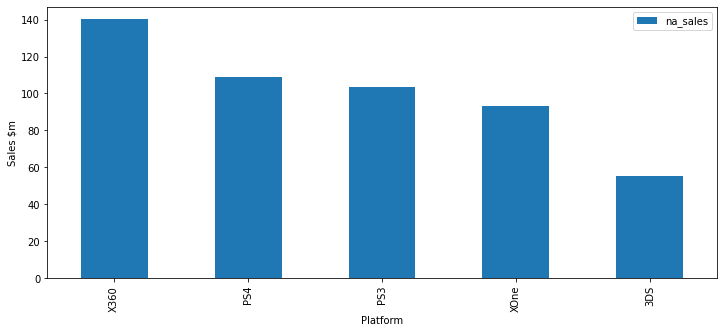

In [46]:
df[df["year_of_release"] >= 2012].pivot_table(index="platform", values="na_sales", aggfunc="sum").sort_values(by="na_sales", ascending=False).iloc[:5].plot(kind="bar", figsize=(12, 5))
plt.xlabel("Platform")
plt.ylabel("Sales $m");

Самая популярная платформа с 2012 по 2016 год является платформа компании Microsoft - X360. Замыкает пятерку популярных платформа компании Nintendo - 3DS. Из распределения видно, что в Северной Америке из консолей старого поколения (Х360, PS3, 3DS) люди больше всего предпочитали X360, однако из консолей нового поколоения (PS4, XOne) люди больше предпочитают Sony PS4.

Проанализурем top-5 платформ в Европе за период с 2012-2016 год.

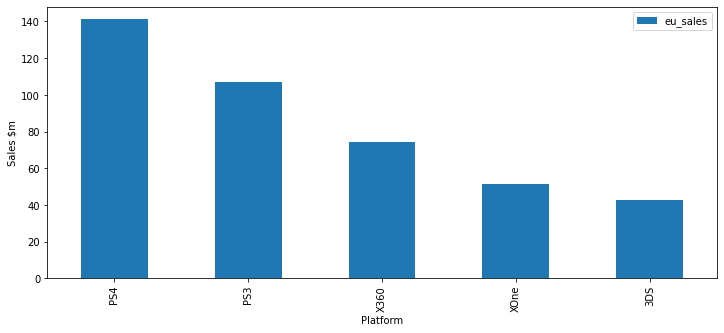

In [47]:
df[df["year_of_release"] >= 2012].pivot_table(index="platform", values="eu_sales", aggfunc="sum").sort_values(by="eu_sales", ascending=False).iloc[:5].plot(kind="bar", figsize=(12, 5))
plt.xlabel("Platform")
plt.ylabel("Sales $m");

Пятерка самых популярных платформ в Европе такая же, как и в Северной Америке, но распределение популярности платформ внутри top-5 уже отличается от Северной Америки. Здесь самая популярная платформа - это PS4. Из консолей старого поколения (PS3, X360, 3DS) люди отдали предпочтение уже Sony PS3.

Проанализурем top-5 платформ в Японии за период с 2012-2016 год.

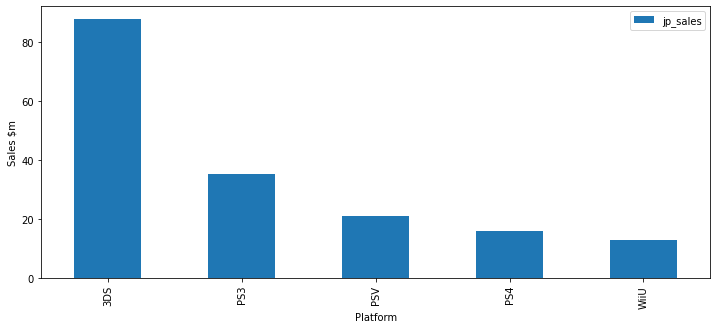

In [48]:
df[df["year_of_release"] >= 2012].pivot_table(index="platform", values="jp_sales", aggfunc="sum").sort_values(by="jp_sales", ascending=False).iloc[:5].plot(kind="bar", figsize=(12, 5))
plt.xlabel("Platform")
plt.ylabel("Sales $m");

Здесь картина кординально отличается от ситуации в Европе и Северной Америке. Самой популярной платформой является Nintendo 3DS, замыкает пятерку Nintendo WiiU. Причем в top-5 платформы компании Microsoft (X360, XOne) не вошли.

Можно сделать вывод, что компания Nintendo оринтирована на рынок японии, а компании Sony и Microsoft на рынок Европы и Северной Америки.

Проанализурем top-5 жанров в Северной Америке за период с 2012-2016 год.

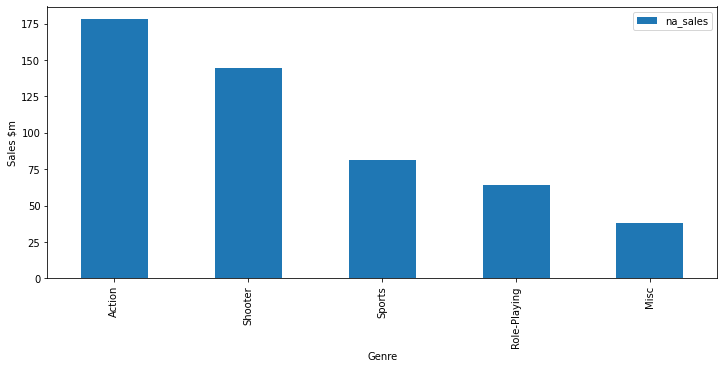

In [49]:
df[df["year_of_release"] >= 2012].pivot_table(index="genre", values="na_sales", aggfunc="sum").sort_values(by="na_sales", ascending=False).iloc[:5].plot(kind="bar", figsize=(12, 5))
plt.xlabel("Genre")
plt.ylabel("Sales $m");

В Северной Америке людям нравятся больше всего нравятся Action, Shooter и Sports.

Проанализурем top-5 жанров в Европе за период с 2012-2016 год.

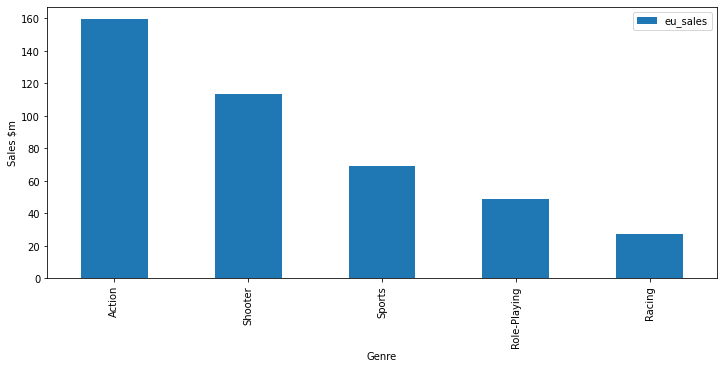

In [50]:
df[df["year_of_release"] >= 2012].pivot_table(index="genre", values="eu_sales", aggfunc="sum").sort_values(by="eu_sales", ascending=False).iloc[:5].plot(kind="bar", figsize=(12, 5))
plt.xlabel("Genre")
plt.ylabel("Sales $m");

В Европе вкусы у людей такие же, как и в Северной Америке.

Проанализурем top-5 жанров в Японии за период с 2012-2016 год.

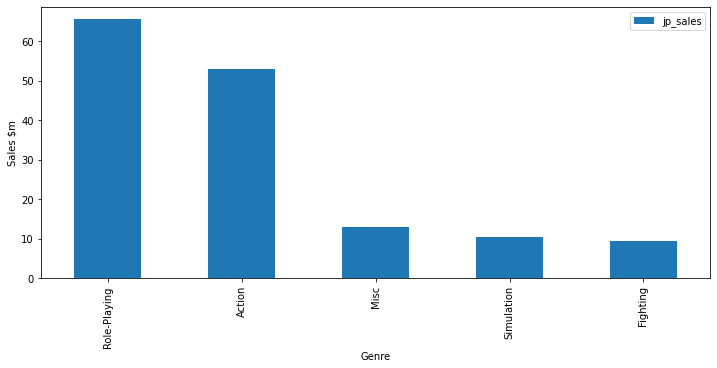

In [51]:
df[df["year_of_release"] >= 2012].pivot_table(index="genre", values="jp_sales", aggfunc="sum").sort_values(by="jp_sales", ascending=False).iloc[:5].plot(kind="bar", figsize=(12, 5))
plt.xlabel("Genre")
plt.ylabel("Sales $m");

В Японии у людей совсем другие предпочтения в играх. Здесь выделяются два жанра - role-playing и action, при этом в Японии не любят играть в Sports и Shooter, в отличие от Северной Америки и Европы.

<b>Выводы</b>

- В Северной Америке и в Европе самые популярные платформы являются платформы компаний Sony (PS3, PS4) и Miscrosoft (X360, XOne), в Японии самая популярная платформа - это платформа компании Nintendo (3DS).
- Предпочтения в жанрах у Серверной Америки и Европы отличаются от предпочтений в Японии. В Северной Америке и Европе предпочитают жанры Action и Shooter, а в Японии - Role-Playing и Action. Такое различие в предпочтениях на Японском рынке можно объяснить тем, что развитие Японской индустрии видеоигр тесно связано с жанром rpg благодаря таким сверхпопулярным сериям, как "Dragon Quest" и "Final Fantasy".

<a id="4.5"></a>
### Определение влияние ESRB рейтинга на продажи в различных регионах

Определим влияние ESRB рейтинга на продажи в Северная Америке.

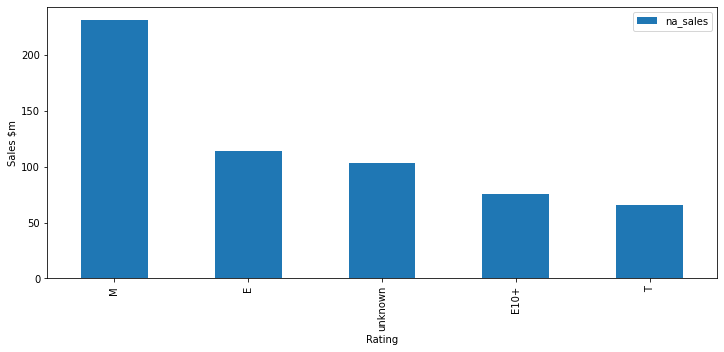

In [52]:
df[df["year_of_release"] >= 2012].pivot_table(index="rating", values="na_sales", aggfunc="sum").sort_values(by="na_sales", ascending=False).plot(kind="bar", figsize=(12,5));
plt.xlabel("Rating")
plt.ylabel("Sales $m");

Определим влияние ESRB рейтинга на продажи в Европе.

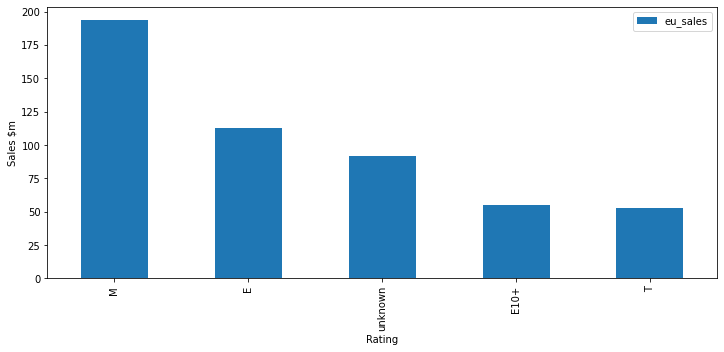

In [53]:
df[df["year_of_release"] >= 2012].pivot_table(index="rating", values="eu_sales", aggfunc="sum").sort_values(by="eu_sales", ascending=False).plot(kind="bar", figsize=(12,5));
plt.xlabel("Rating")
plt.ylabel("Sales $m");

Определим влияние ESRB рейтинга на продажи в Японии.

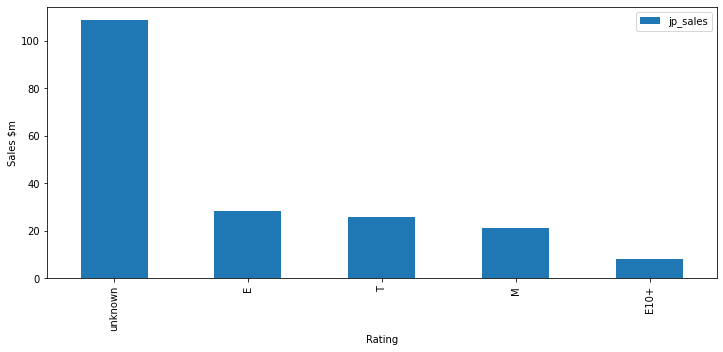

In [54]:
df[df["year_of_release"] >= 2012].pivot_table(index="rating", values="jp_sales", aggfunc="sum").sort_values(by="jp_sales", ascending=False).plot(kind="bar", figsize=(12,5));
plt.xlabel("Rating")
plt.ylabel("Sales $m");

Самые популярные игры в Европе и Северной Америке рейтинг *M* ("Mature" - для взрослых, не подходит для подростков до 17 лет), что говорит о том, что рейтинг ESRB слабо влияет на продажи игр, так как данный рейтинг ограничивает значительный охват аудитории видеоигр. В японии самые популярные игры имеют неизвестный (*unknown*) рейтинг ESRB. Если учитывать, что самая пополярная платформа в Японии являет 3DS компании Nintendo, которая является японской корпорацией, то можно предположить, что японцы предпочитают играть в игры, выпущенные на свой внутренний рынок, где не представлена ESRB, и таким играм не присуждается данный рейтинг.

<b>Выводы</b>

- Рейтинг ESRB слабо влияет на продажи, так как самые продаваемые игры в Европе и Северной Америке имеют рейтинг *M* ("Mature" - для взрослых, не подходит для подростков до 17 лет).
- В Японии самые продаваемые игры не имеют рейтинг ESRB, так как там самые популярные игры - это игры, выпущенные на свой внутренний рынок, где организация ESRB не представлена.

<a id="5"></a>
## Статистический анализ данных

<a id="5.1"></a>
### Определение изменения пользовательского рейтинга и рейтинга критиков в различных жанрах

Построим гистрограммы распределения пользовательских оценок и оценок критиков по различным жанрам.

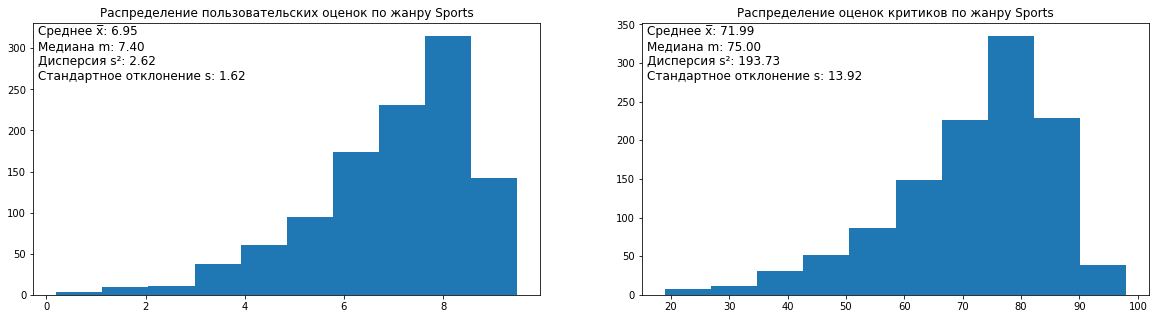

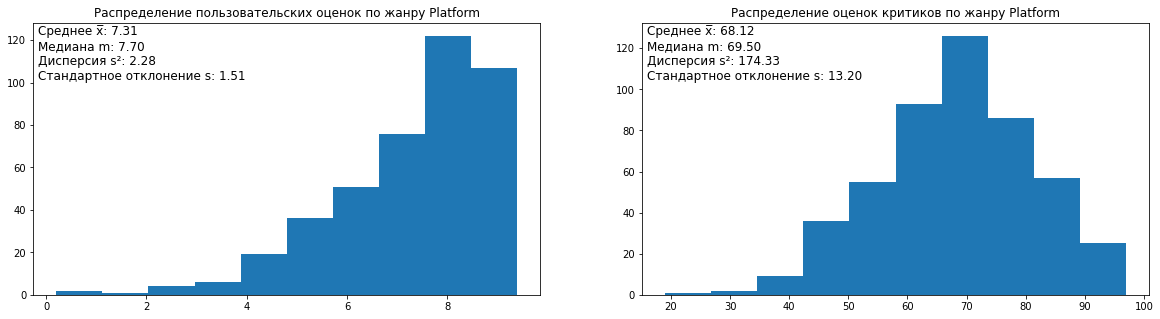

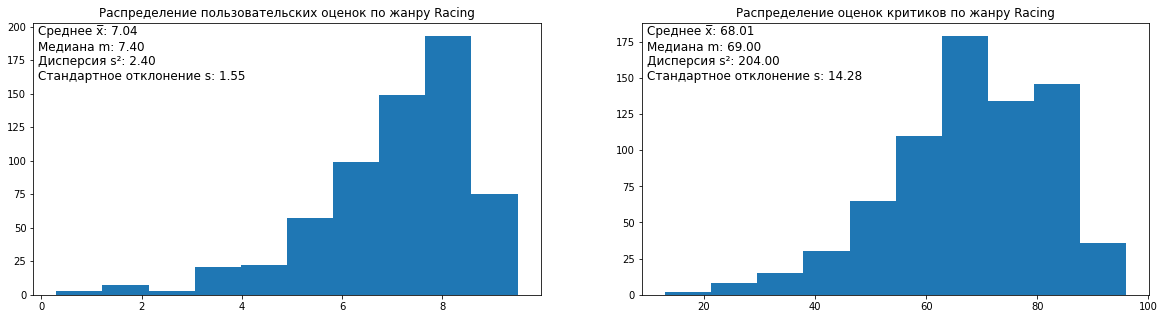

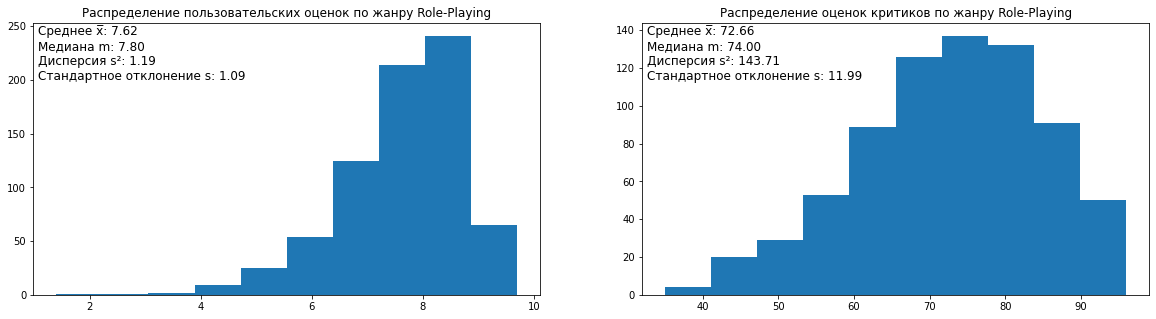

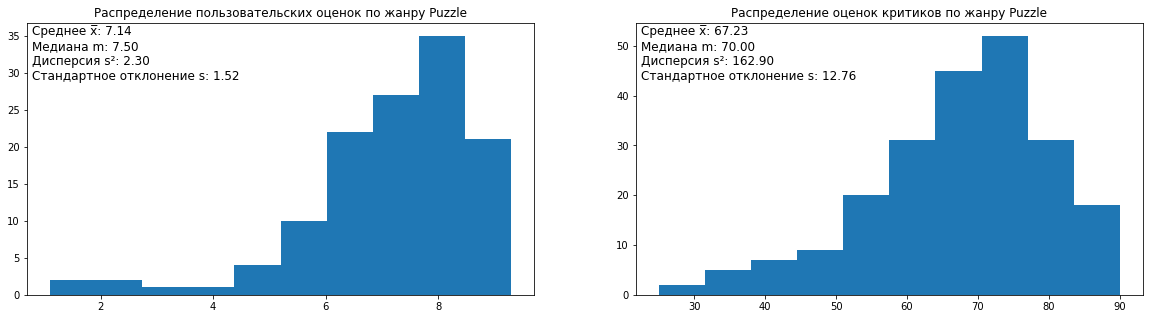

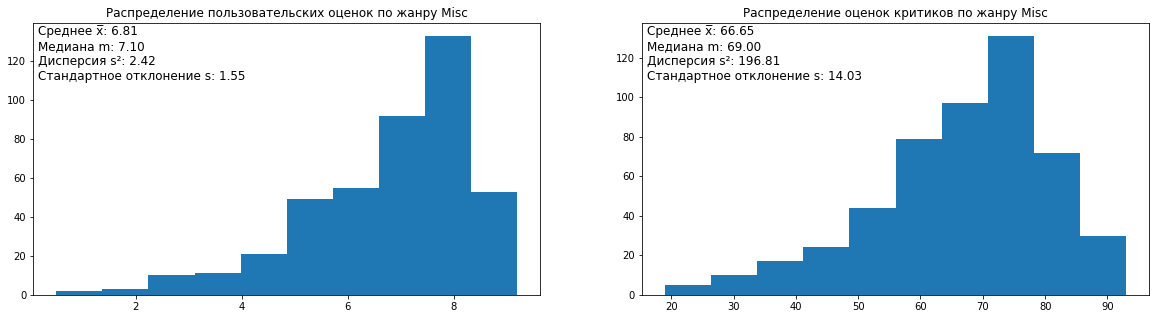

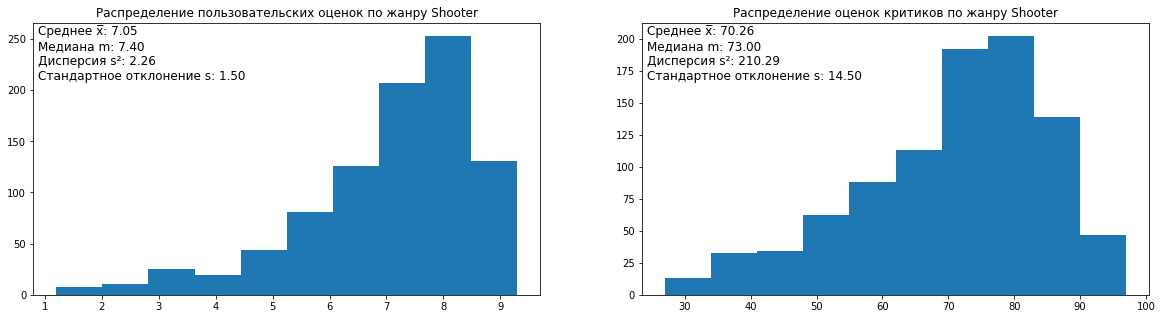

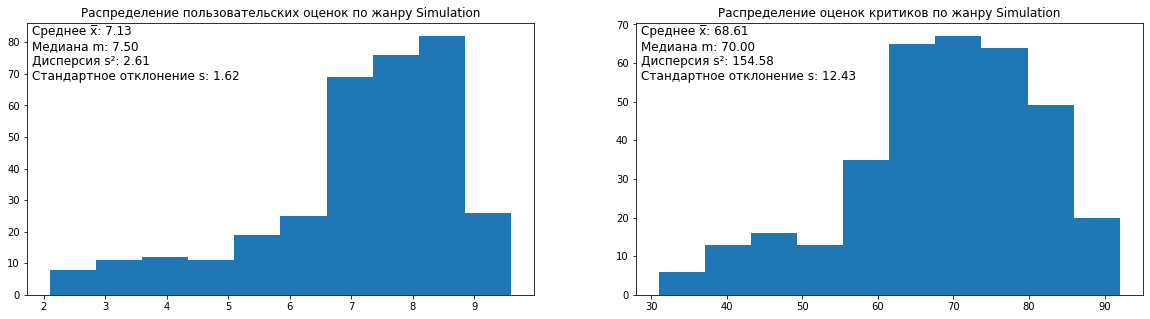

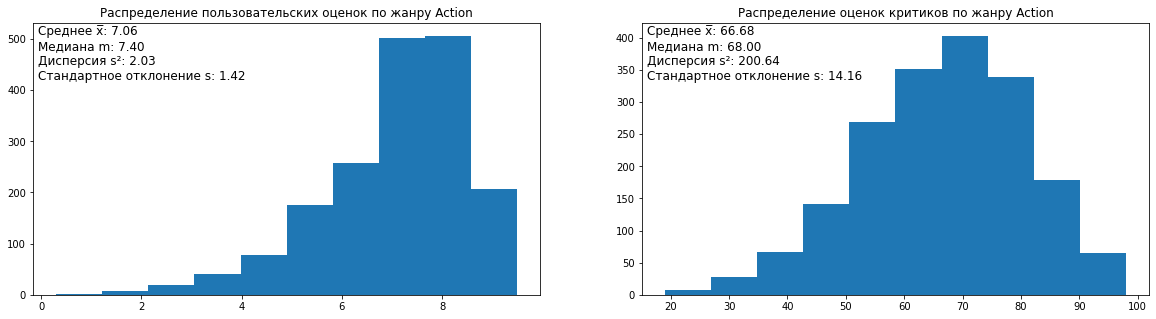

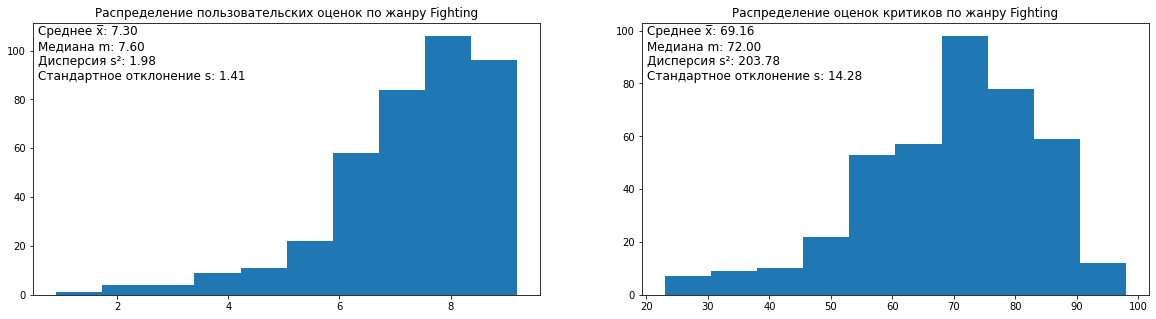

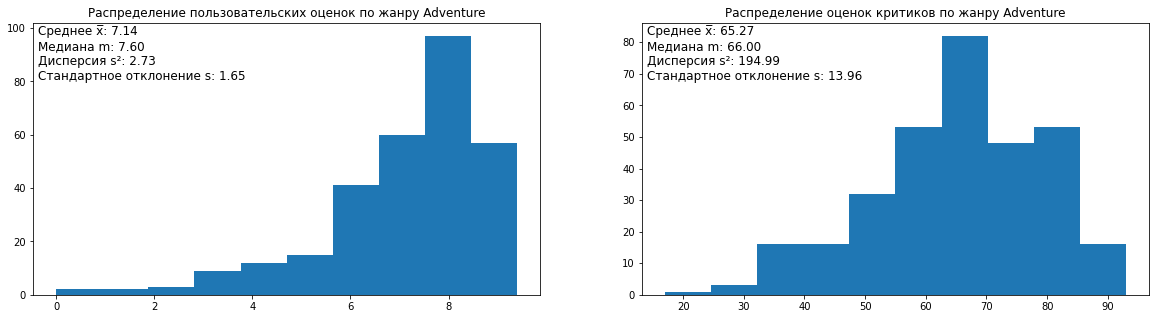

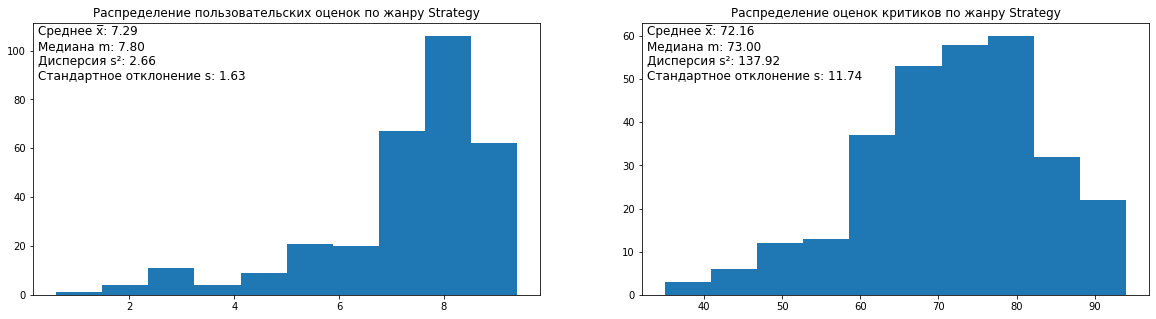

In [55]:
list_of_genres = df["genre"].unique()

for genre in list_of_genres:
    fig = plt.figure(figsize=[20, 5])
    ax_1 = fig.add_subplot(1, 2, 1)
    ax_2 = fig.add_subplot(1, 2, 2)
    
    user_score_data = df.query(f"genre == '{genre}'")["user_score"]
    user_score_mean = user_score_data.mean()
    user_score_median = user_score_data.median()
    user_score_var = np.var(user_score_data, ddof=1)
    user_score_dev = np.std(user_score_data, ddof=1)
    
    critic_score_data = df.query(f"genre == '{genre}'")["critic_score"]
    critic_score_mean = critic_score_data.mean()
    critic_score_median = critic_score_data.median()
    critic_score_var = np.var(critic_score_data, ddof=1)
    critic_score_dev = np.std(critic_score_data, ddof=1)
    
    ax_1.hist(x=user_score_data)
    ax_1.set_title(f"Распределение пользовательских оценок по жанру {genre}")
    ax_1.text(0.01, 0.79, f"Среднее x̅: {user_score_mean:.2f}\nМедиана m: {user_score_median:.2f}\nДисперсия s\u00b2: {user_score_var:.2f}\nСтандартное отклонение s: {user_score_dev:.2f}", fontsize=12, transform=ax_1.transAxes)

    ax_2.hist(x=critic_score_data)
    ax_2.set_title(f"Распределение оценок критиков по жанру {genre}")
    ax_2.text(0.01, 0.79, f"Среднее x̅: {critic_score_mean:.2f}\nМедиана m: {critic_score_median:.2f}\nДисперсия s\u00b2: {critic_score_var:.2f}\nСтандартное отклонение s: {critic_score_dev:.2f}", fontsize=12, transform=ax_2.transAxes)


<b>Выводы</b>

- В среднем оценки пользователей выше, чем оценки критиков. Гистограммы имеют несимметричное распределение с перекошенностью влево, т.е. количество игр с оценками ниже среднего больше, чем с оценками ниже среднего. Вероятно, что игры, которые получают более высокие оценки намного дороже производить и многие компании не имеют ресуры для найма высококвалифицированных специалистов для разработки качественных игр.

- Самая высокая средняя оценка принадлежит жанру Roly-playing по пользовательской оценке (7,62) и по оценке критиков (70,66), а самая низкая средняя относится к жанру Misc - у пользователей (6.95) и к жанру Adventure - у критиков (65,27).

<a id="5.2"></a>
### Проверка гипотез

Сформулируем две гипотезы:
- Средние пользовательские рейтинги платформ *XOne* и *PC* одинаковые;
- Средние пользовательские рейтинги жанров *Action* и *Sports* разные.

Та как XOne является платформой нового поколения, выпущенной в 2013 году, то будем анализировать данные, начиная с 2013 года, удалив заранее из таблица данные с пропущенными значениями.

Для проверки данных гипотез будем вычислять вероятность того, что средние двух генеральных совокупностей равны, используя критерий значимости с пороговым значением уровня значимости равным 0,05. Для вычислений будем применяться метод ttest_ind из библиотеки scipy, который является двусторонним тестом для проверки нулевой гипотезы о том, что средние двух генеральных совокупностей равны.

<a id="5.2.1"></a>
#### Проверка первой гипотезы

Разберем первую гипотезу - средние пользовательские рейтинги платформ *XOne* и *PC* одинаковые. Сформулируем нулевую и альтернативную гипотезу.
<p>Нулевая гипотеза <b>H<sub>0</sub></b> будет звучат так: средние пользовательские рейтинги платформ XOne и PC <b>одинаковые</b>.
<p>Альтернативная гипотеза <b>H<sub>1</sub></b> звучит: cредние пользовательские рейтинги платформ XOne и PC <b> разные</b>.

In [56]:
df1 = df.dropna(subset=["user_score"])
stat_population_1 = df1[(df1["platform"]=="XOne") & (df1["year_of_release"]>=2013)]["user_score"]
stat_population_2 = df1[(df1["platform"]=="PC") & (df1["year_of_release"]>=2013)]["user_score"]

alpha = 0.05

results = st.ttest_ind(
    stat_population_1,
    stat_population_2,
    equal_var=False
)
if results.pvalue < alpha:
    print("Есть основания для отвержения нулевой гипотезы", f"p-уровень значимости равен:{results.pvalue:.2f}", sep='\n')
else:
    print("Нет основания для отвержения нулевой гипотезы", f"p-уровень значимости равен:{results.pvalue:.2f}", sep='\n')

Нет основания для отвержения нулевой гипотезы
p-уровень значимости равен:0.15


<b>Выводы</b>

P-уровень значимости меньше порогового значения, то принимаем нулевую гипотезу, следовательно, средние оценки пользовательские рейтинги платформ XOne и PC <b>одинаковые</b>.

<a id="5.2.2"></a>
#### Проверка второй гипотезы

Разберем вторую гипотезу - средние пользовательские рейтинги жанров *Action* и *Sports* разные.
<p>Сформулируем нулевую гипотезу <b>H<sub>0</sub></b>: средние пользовательские рейтинги платформ Action и Sports <b>одинаковые</b>.
<p>Альтернативная гипотеза <b>H<sub>1</sub></b>: cредние пользовательские рейтинги платформ Action и Sports <b>разные</b>.

In [57]:
stat_population_1 = df1[(df1["genre"]=="Action") & (df1["year_of_release"]>=2013)]["user_score"]
stat_population_2 = df1[(df1["genre"]=="Sports") & (df1["year_of_release"]>=2013)]["user_score"]

alpha=0.05

results = st.ttest_ind(
    stat_population_1,
    stat_population_2,
    equal_var=False
)

if results.pvalue < alpha:
    print("Есть основания для отвержения нулевой гипотезы", f"p-уровень значимости равен:{results.pvalue}", sep='\n')
else:
    print("Нет основания для отвержения нулевой гипотезы", f"p-уровень значимости равен:{results.pvalue}", sep='\n')

Есть основания для отвержения нулевой гипотезы
p-уровень значимости равен:1.4460039700704315e-20


<b>Выводы</b>

P-уровень значимости выше порогового значения, принимаем альтернативную гипотезу, следовательно, средние оценки пользовательские рейтинги жанров Action и Sports <b>разные</b>.

<a id="6"></a>
## Общие выводы

На основании исследования можно сделать следующие выводы:
- Рост продаж игр на консолях и персональных комьютерах был до 2009 года, вероятно, это связано с мировым финансовым кризисом 2008 и началом развития индустрии мобильных игр на смартфонах.
- Продолжительность существования платформ в большинстве случаев составляет 10-11 лет.
- Самые популряные платформы за все время сущестования индустрии комьютерных игр на момент 2016 года является PS2 (Sony), X360 (Microsoft), Wii (Nintendo).
- В целом пользователи отдают предпочтение консолям, а не персональному компьютеру. 
- Потенциально прибыльными платформами являются PS4, XOne. Это самые популярные платформы за 2014-2016, с каждым год продажи по данным платформам растут.
- Самые прибыльные жанры: action, shooter, role-playing и sports.
- В регионах «Северная Америка» и «Европа» предпочитают жанры action, shooter и sports. В регионе «Япония» предпочительными оказались жанры role-playing и action.
- Рейтинг ESRB слабо коррелирует с продажами игр.

Были выдвинуты 2 гипотезы:
- Средние пользовательские рейтинги платформ *XOne* и *PC* одинаковые;
- Средние пользовательские рейтинги жанров *Action* и *Sports* разные.

В результате первая гипотеза была подтверждена, вторая гипотеза тоже была подтвержена.

На основании полученных выводов, можно привести следующие рекомендации:
- В ближайщие годы будут самыми популярными платформами будут XOne, PS4 и отдавать предпочтение этим жанрам, так как их популярность будет на высоком уровне еще продолжительное количество времени.
- При организации рекламных мероприятий на рынке Европы и Серевной Америки стоить обратить особое внимание на жанры action и shooter.
- При организации рекламных мероприятий на рынке Японии рекомендуется отдавать предпочтение играм жанра role-playining, как традиционно самый популярный жанр в Японии, а также жанру action.